
Names: Jimmy Yang, Connor Andreas, Zihan Wang

CSE 163

Final Project

Description: Generate functions to answer our research question number 3:


**Can machine learning classification algorithms accurately and effectively predict individuals' suicide rates based on their mental health disorder diagnosis and additional features? Use the input features to predict numeric future suicide rates.**


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image, display
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

sns.set()

%matplotlib inline

**GENERAL STEPS:**


1. Merge Suicide Rate, various kind of mental disorder, and happiness score. -- merge by entity.
2. Find potential correlations between disorders and suicide rate for different regions by ploting.
3. Determine which mental disorder can most likely lead to suicide and focus on this disorder in making classfication.
4. Based on associate info, determine whether or not certain country can be classified as high-suicide-rate country.


In [21]:
def merge_disorder_suicide(disorder: pd.DataFrame, suicide: pd.DataFrame):
    """
    Merge and return suicide dataset and mental disorder dataset.
    """
    disorder = disorder.dropna()
    disorder['Year'] = disorder['Year'].astype(int)

    # merge dataframes of mental disorder and suicide rates.
    merged = suicide.merge(disorder, left_on=['Entity', 'Year'],
                           right_on=['Entity', 'Year'], how='right')
    # clean all the cells with NaN values.
    merged_clean = merged.dropna()

    return merged_clean

In [22]:
def plot_disorder_suicide(merged: pd.DataFrame):
    """
    Plot line plot associating different types of mental
    disorders and suicide rate, and find the one disorder
    with highest correlation with suicide rate.
    """
    # make all the cells numeric.
    merged['Schizophrenia (%)'] = merged['Schizophrenia (%)'].astype(float)
    merged['Bipolar disorder (%)'] = merged[
        'Bipolar disorder (%)'
        ].astype(float)
    merged['Eating disorders (%)'] = merged[
        'Eating disorders (%)'
        ].astype(float)

    # plot and find regression line.
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Schizophrenia (%)',
                kind='scatter', hue='Year')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Bipolar disorder (%)',
                hue='Year', kind='scatter')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Eating disorders (%)',
                hue='Year', kind='scatter')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Anxiety disorders (%)',
                hue='Year', kind='scatter')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Drug use disorders (%)',
                hue='Year', kind='scatter')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Depression (%)', hue='Year',
                kind='scatter')
    sns.relplot(data=merged, x='Age-standardized suicide rate - '
                'Sex: both sexes', y='Alcohol use disorders (%)',
                hue='Year', kind='scatter')

    plt.show()
    plt.savefig('plot_suicide_disorder.png')

**Visualize the machine learning process.**

In [23]:
# visualizing the model
def plot_tree(model, features, labels):
    """
    A function to draw out the decision tree.
    """
    dot_data = export_graphviz(model, out_file=None,
                               feature_names=features.columns,
                               class_names=labels.unique(),
                               impurity=False,
                               filled=True, rounded=True,
                               special_characters=True)
    graphviz.Source(dot_data).render('tree.gv', format='png')
    display(Image(filename='tree.gv.png'))

In [24]:
def ml_regress(disorder_suicide: pd.DataFrame):
    """
    Predict future suicide rate based on input mental disorder features.
    """
    dis_sui = disorder_suicide[['Schizophrenia (%)',
                                'Bipolar disorder (%)',
                                'Eating disorders (%)',
                                'Anxiety disorders (%)',
                                'Depression (%)',
                                'Drug use disorders (%)',
                                'Alcohol use disorders (%)',
                                'Age-standardized suicide rate - '
                                'Sex: both sexes']]

    # Separate data into features and labels
    features = dis_sui.loc[:, dis_sui.columns !=
                           'Age-standardized suicide rate - Sex: both sexes']
    labels = dis_sui['Age-standardized suicide rate - Sex: both sexes']

    # Break data in 80% train and 20% test.
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3)

    print(len(features_train), len(features_test))

    # Create an untrained model
    model = DecisionTreeRegressor(max_depth=9)
    # Train it on our training data
    model.fit(features_train, labels_train)

    # Compute training accuracy.
    train_predictions = model.predict(features_train)
    # Assess the accuracy of the model
    error_train = mean_squared_error(labels_train, train_predictions)
    print('Train Error:', error_train)

    # Compute training accuracy.
    test_predictions = model.predict(features_test)
    # Assess the accuracy of the model
    error_test = mean_squared_error(labels_test, test_predictions)
    print('Test Error:', error_test)

    # Call function plot_tree to draw out decision tree.
    plot_tree(model, features, labels)

**Call functions**

C:\Users\yang9\AppData\Local\Temp\ipykernel_103636\3990346954.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_disorder = pd.read_csv(mental_dis_path)
C:\Users\yang9\AppData\Local\Temp\ipykernel_103636\227711454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder['Year'] = disorder['Year'].astype(int)


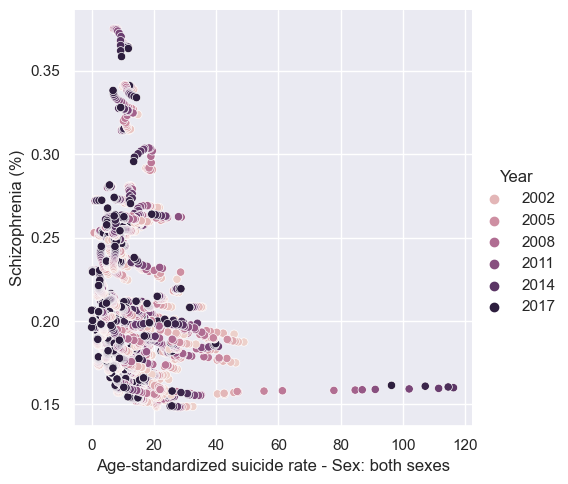

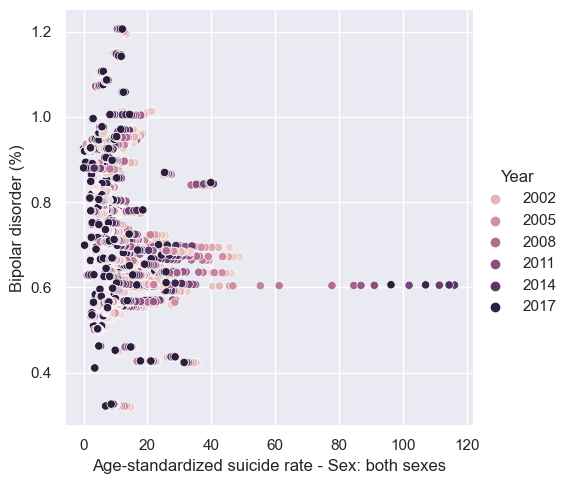

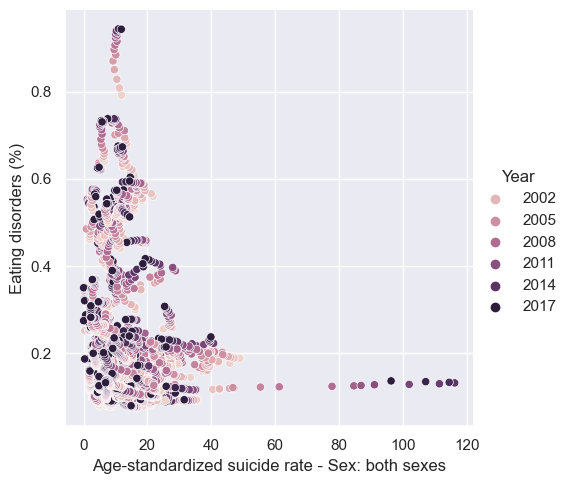

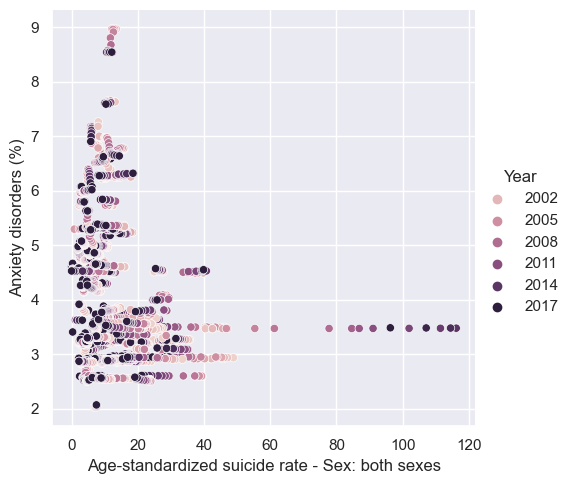

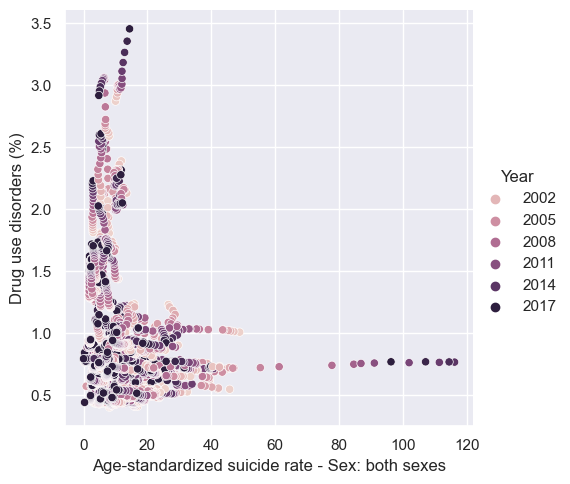

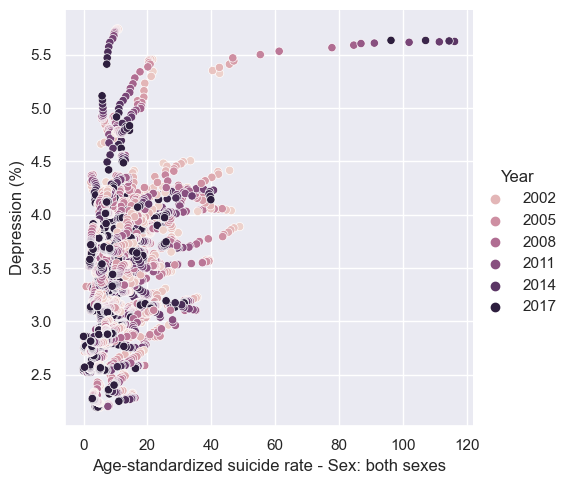

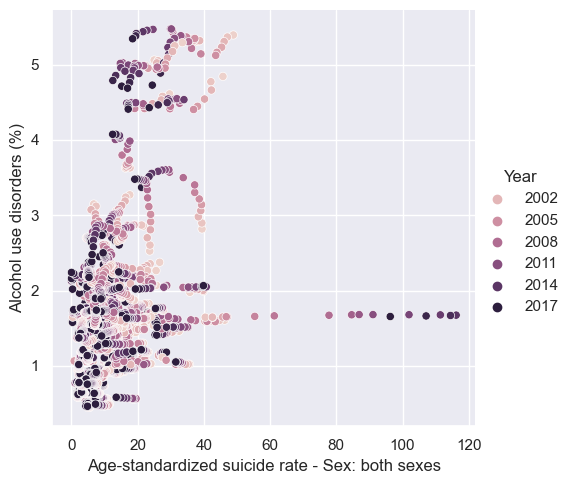

2280 978
Train Error: 5.035691997009744
Test Error: 18.03765433746445


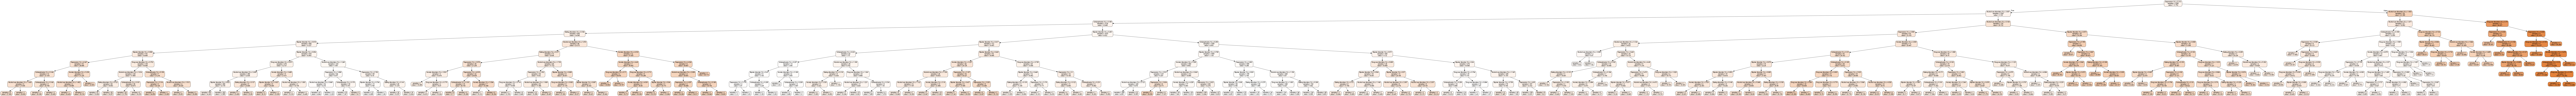

<Figure size 640x480 with 0 Axes>

In [25]:
def main():
    mental_dis_path = 'Mental_data/Mental_health_Depression_disorder_Data.csv'
    suicide_path = 'Suicide_data/death-rate-from-suicides-gho.csv'
    suicide_num = pd.read_csv(suicide_path)
    mental_disorder = pd.read_csv(mental_dis_path)

    # Merge two dataframes.
    disorder_suicide = merge_disorder_suicide(mental_disorder, suicide_num)
    # Plot relationship between suicide rate and mental disorders.
    plot_disorder_suicide(disorder_suicide)
    # Machine learning -- regression.
    ml_regress(disorder_suicide)


if __name__ == '__main__':
    main()